In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [61]:
# matplotlib image size and resolution
mpl_options = {"figsize":(18,8), "dpi":100}
sns.set(rc={'figure.figsize':(18,8)})
sns.set_style('white')

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## sns.distplot 
sns.distplot plots a normed histogram of the given data with KDE. 

Histogram is a binned distrobution of data, can be normed (density distribution or not_normed - value distribution)


args** are rug = T/F, hist = T/F, kde = T/F, norm_hist = T/F

1. rug; if true than it shows datapoints in distplot, default - False 

2. hist; shows a histogram of data, default = True

3. kde; Kernel estimated Density function, default = True 

4. norm_host; shows norm hist aka density distribution, o\w value distribution, default = True 

EXTRAS 

to fit diffent types of distibutions we use scipy package!
from scipy import stats

sns.distplot(tips.total_bill, fit = stats.gamma, kde = False)

fit; makes a fitted distibution of our choice go over the initial data, works best with KDE

if fit = stats.dist and kde = True, than fit - black line, kde - blue line

/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

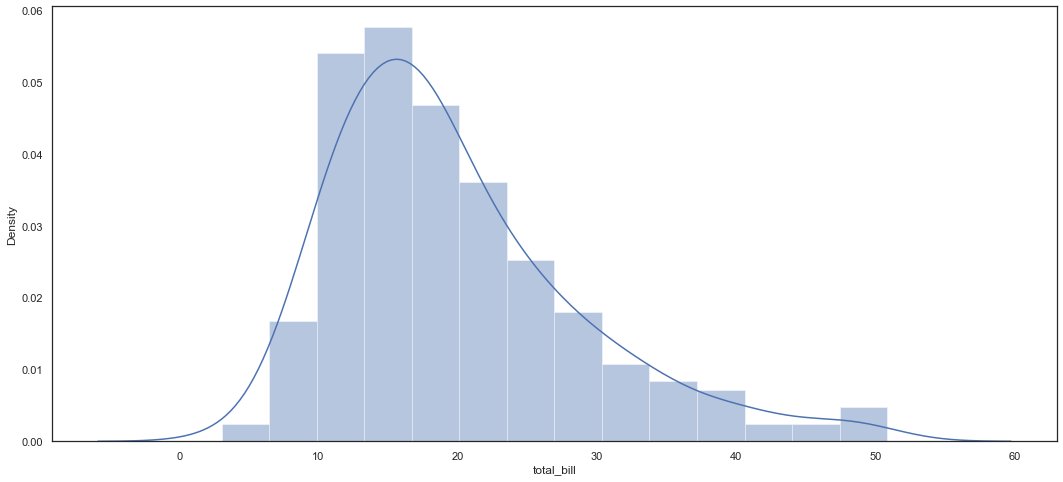

In [77]:
sns.distplot(tips.total_bill, hist = True)

/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

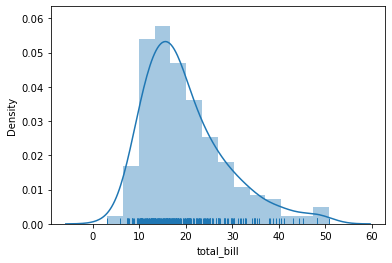

In [19]:
sns.distplot(tips.total_bill, rug = True)

/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

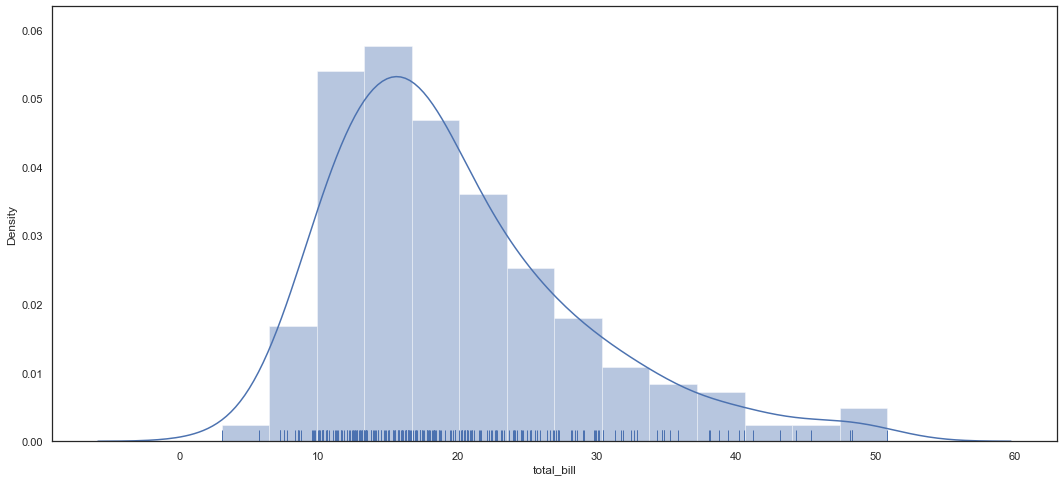

In [63]:
sns.distplot(tips.total_bill, rug = True, hist = True, kde = True)

/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

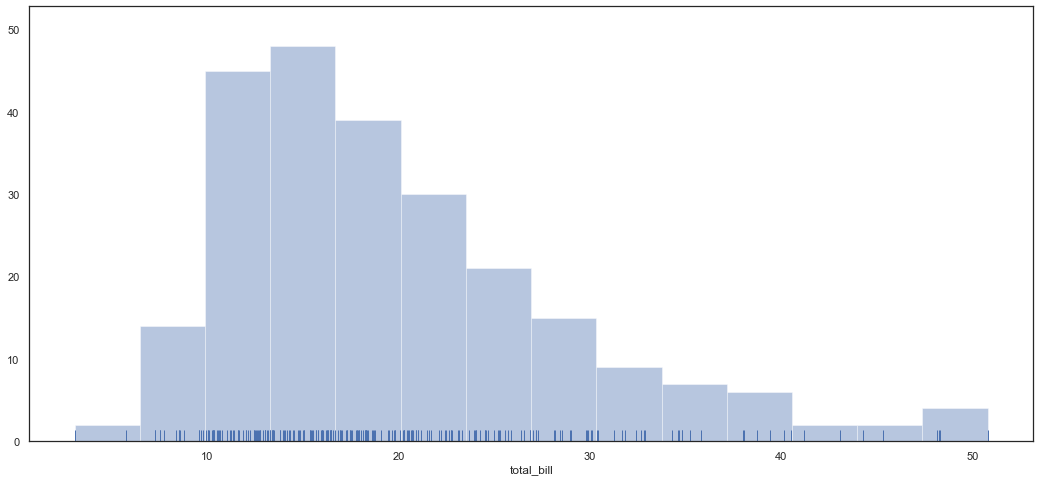

In [66]:
sns.distplot(tips.total_bill, rug = True, hist = True, kde = False, norm_hist = False)

/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

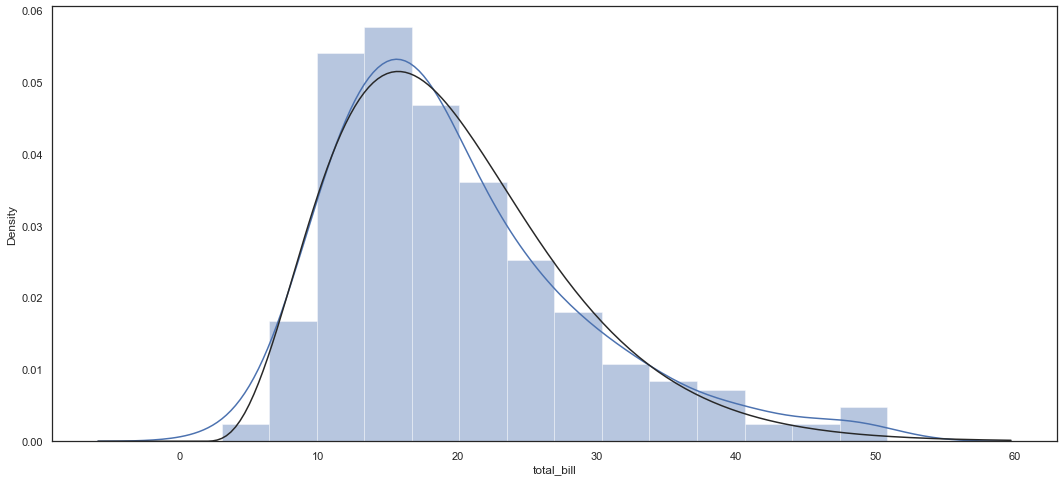

In [65]:
from scipy import stats 
sns.distplot(tips.total_bill, fit = stats.gamma)

/Users/tima/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

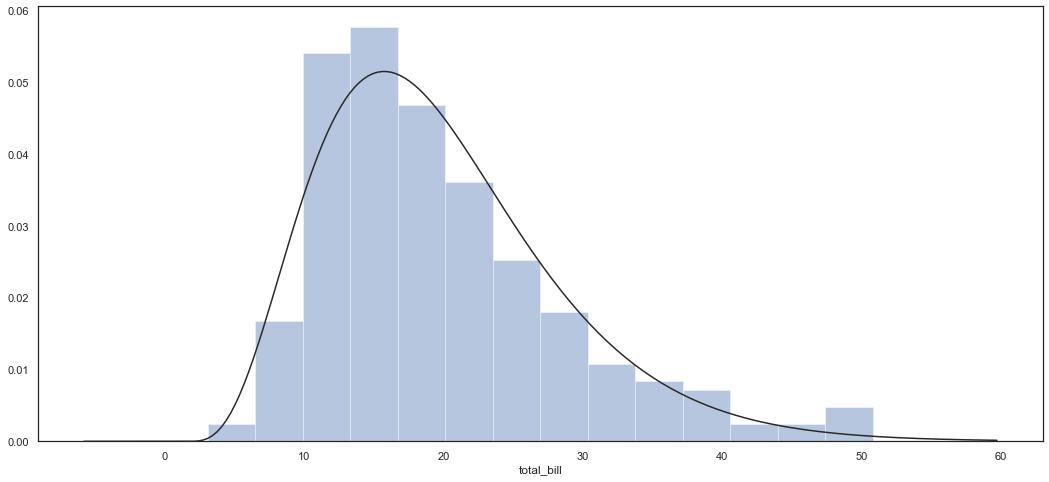

In [67]:
sns.distplot(tips.total_bill, fit = stats.gamma, kde = False)

### how does kde work?

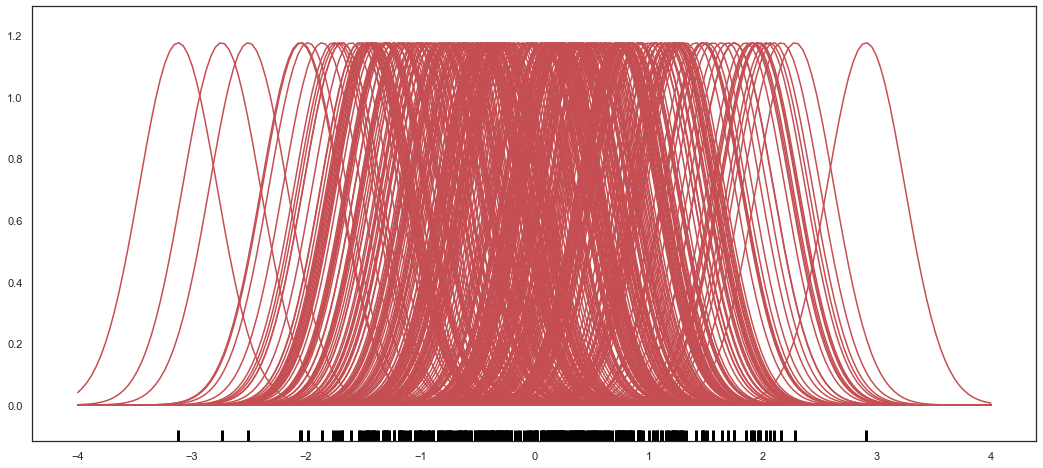

In [73]:
x = np.random.normal(0, 1, size = 300)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, c = 'r')
    
sns.rugplot(x, color = '.001', linewidth = 3);

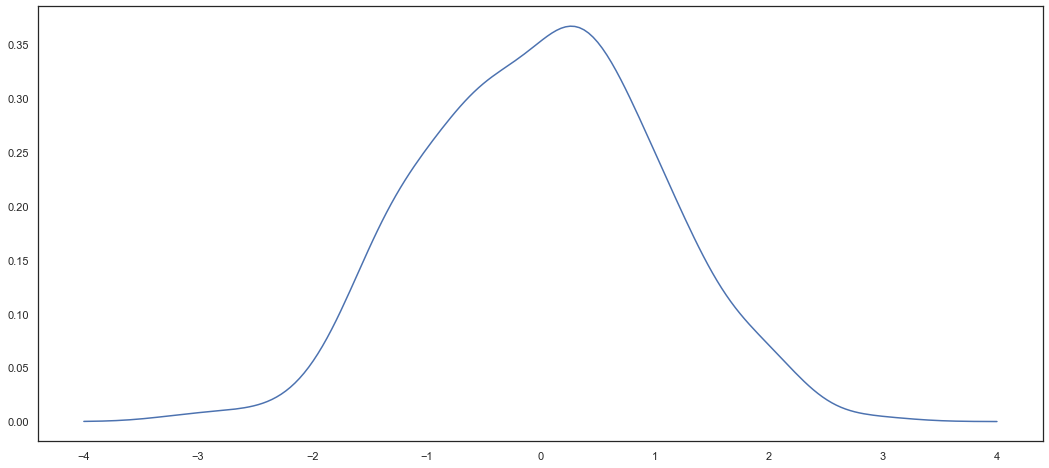

In [74]:
from scipy import integrate 

density = np.sum(kernels, axis = 0)
density /= integrate.trapz(density, support)
plt.plot(support, density);